In [552]:
import numpy as np
import pandas as pd
import seaborn as sns

### Pivot Tables

In [553]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [554]:
df.groupby('sex', observed=False)[['total_bill']].mean()

,total_bill
sex,
Male,20.744076
Female,18.056897


In [555]:
df.groupby(['sex','smoker'],observed=False)[['total_bill']].mean().unstack()

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [556]:
df.pivot_table(index='sex',columns='smoker',values='total_bill', observed=False)

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [557]:
# aggfunc
df.pivot_table(index='sex',columns='smoker',values='total_bill',observed=False,aggfunc='count')

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [558]:
# all cols together
df.pivot_table(index='sex', columns='smoker', values=['total_bill','tip'], observed=False)

tip           total_bill           
smoker       Yes        No        Yes         No
sex                                             
Male    3.051167  3.113402  22.284500  19.791237
Female  2.931515  2.773519  17.977879  18.105185

In [559]:
# Multidimensional
df.pivot_table(index=['sex', 'smoker'], columns=['day', 'time'], values=['total_bill', 'tip'], observed=False, aggfunc={'total_bill': 'mean', 'tip': 'max'})

tip                                   total_bill         \
day            Thur          Fri           Sat    Sun       Thur          
time          Lunch Dinner Lunch Dinner Dinner Dinner      Lunch Dinner   
sex    smoker                                                             
Male   Yes     5.00    NaN  2.20   4.73  10.00    6.5  19.171000    NaN   
       No      6.70    NaN   NaN   3.50   9.00    6.0  18.486500    NaN   
Female Yes     5.00    NaN  3.48   4.30   6.50    4.0  19.218571    NaN   
       No      5.17    3.0  3.00   3.25   4.67    5.2  15.899167  18.78   

                                                        
day                  Fri                Sat        Sun  
time               Lunch  Dinner     Dinner     Dinner  
sex    smoker                                           
Male   Yes     11.386667  25.892  21.837778  26.141333  
       No            NaN  17.475  19.929063  20.403256  
Female Yes     13.260000  12.200  20.266667  16.540000  
       No      15.980000  22.750  19.003846  20.824286

In [560]:
df.pivot_table(index='sex',columns='smoker',values='total_bill',observed=False,aggfunc='sum',margins=True)

smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [561]:
df1=pd.read_csv('expense_data.csv')
df1

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0


In [562]:
df1['Date']=pd.to_datetime(df1['Date'])

In [563]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [564]:
df1['Month'] = df1['Date'].dt.month_name()

In [565]:
df1 = df1.drop(columns=['Subcategory', 'Note.1'])

In [566]:
df1.head()

,Date,Account,Category,Note,INR,Income/Expense,Amount,Currency,Account.1,Month
0,2022-03-02 10:11:00,CUB - online payment,Food,Brownie,50.0,Expense,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,To lended people,300.0,Expense,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,Dinner,78.0,Expense,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,Metro,30.0,Expense,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,Snacks,67.0,Expense,67.0,INR,67.0,March


<Axes: xlabel='Month'>

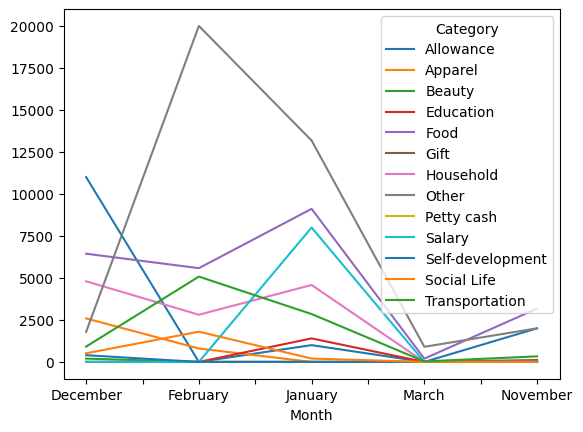

In [567]:
df1.pivot_table(index='Month',columns='Category',values='INR',aggfunc='sum',fill_value=0).plot()

<Axes: xlabel='Month'>

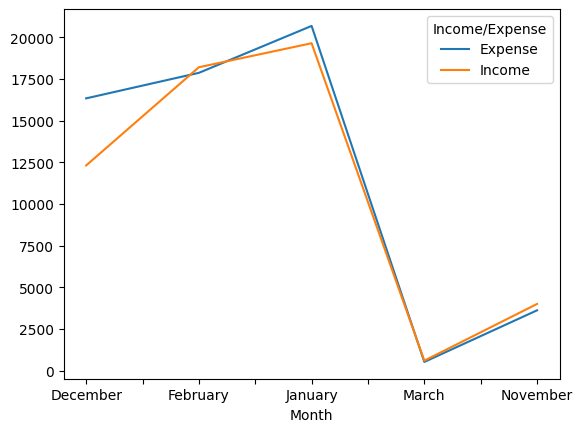

In [568]:
df1.pivot_table(index='Month',columns='Income/Expense',values='INR',aggfunc='sum',fill_value=0).plot()

### Vectorised String Operations

In [569]:
# How pandas solves this issue?
s = pd.Series(['cat','mat',None,'rat'])
# string accessor
s.str.startswith('c')

0     True
1    False
2     None
3    False
dtype: object

In [570]:
df=pd.read_csv('titanic.csv')
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [571]:
# Common Functions
# lower/upper/capitalize/title
df['Name'].str.upper()
df['Name'].str.capitalize()
df['Name'].str.title()
# len
df['Name'][df['Name'].str.len() == 82].values[0]

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

In [572]:
# split -> get
df['Lastname'] = df['Name'].str.split(',').str.get(0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Lastname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [573]:
df[['Title','Firstname']]=df['Name'].str.split(',').str.get(1).str.strip().str.split(' ',n=1,expand=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Lastname,Title,Firstname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr.,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss.,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs.,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr.,William Henry


In [574]:
df[['Title','Firstname']]=df['Name'].str.split(',').str.get(1).str.strip().str.split(' ',n=1,expand=True)
df.head()
df['Title'].value_counts()

Title
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: count, dtype: int64

In [575]:
# search john -> both case
df[df['Firstname'].str.contains('john',case=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Lastname,Title,Firstname
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S,Turpin,Mrs.,William John Robert (Dorothy Ann Wonnacott)
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S,Rogers,Mr.,William John
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S,Doling,Mrs.,John T (Ada Julia Bone)
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S,Barton,Mr.,David John
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S,Turpin,Mr.,William John Robert
160,161,0,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,371362,16.1000,NaN,S,Cribb,Mr.,John Hatfield
162,163,0,3,"Bengtsson, Mr. John Viktor",male,26.0,0,0,347068,7.7750,NaN,S,Bengtsson,Mr.,John Viktor
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S,Goldsmith,Master.,"Frank John William ""Frankie"""
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,Baumann,Mr.,John D


In [576]:
# find lastnames with start with vowels and ends with consonants
df[df['Lastname'].str.contains('^[aeiouAEIOU].+[^aeiouAEIOU]$')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Lastname,Title,Firstname
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr.,William Henry
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,Andersson,Mr.,Anders Johan
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,Asplund,Mrs.,Carl Oscar (Selma Augusta Emilia Johansson)
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Emir,Mr.,Farred Chehab
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,O'Dwyer,Miss.,"Ellen ""Nellie"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,835,0,3,"Allum, Mr. Owen George",male,18.0,0,0,2223,8.3000,NaN,S,Allum,Mr.,Owen George
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S,Abbing,Mr.,Anthony
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S,Andersson,Master.,Sigvard Harald Elias
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,Aks,Mrs.,Sam (Leah Rosen)


In [577]:
# slicing
df['Name'].str[::-1]

0                                sirraH newO .rM ,dnuarB
1      )reyahT sggirB ecnerolF( yeldarB nhoJ .srM ,sg...
2                                 aniaL .ssiM ,nenikkieH
3           )leeP yaM yliL( htaeH seuqcaJ .srM ,ellertuF
4                               yrneH mailliW .rM ,nellA
                             ...                        
886                                sazouJ .veR ,alivtnoM
887                         htidE teragraM .ssiM ,maharG
888             "eirraC" neleH enirehtaC .ssiM ,notsnhoJ
889                                llewoH lraK .rM ,rheB
890                                  kcirtaP .rM ,yelooD
Name: Name, Length: 891, dtype: object

### Date and Time in Pandas

In [578]:
# creating a timestamp
type(pd.Timestamp('2023/1/5'))

pandas._libs.tslibs.timestamps.Timestamp

In [579]:
# variations
pd.Timestamp('2023-1-5')
pd.Timestamp('2023, 1, 5')

Timestamp('2023-01-05 00:00:00')

In [580]:
# providing time also
pd.Timestamp('5th January 2023 9:21AM')

Timestamp('2023-01-05 09:21:00')

In [581]:
# using datetime.datetime object
import datetime as dt
x = pd.Timestamp(dt.datetime(2023,1,5,9,21,56))
x

Timestamp('2023-01-05 09:21:56')

In [582]:
x.minute

21

##### why separate objects to handle data and time when python already has datetime functionality?
- syntax wise datetime is very convenient
- But the performance takes a hit while working with huge data. List vs Numpy Array
- The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
- The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.


In [583]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [584]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

- Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large 

- Pandas Timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64

- From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

In [585]:
# from strings
type(pd.DatetimeIndex(['2023/1/1','2022/1/1','2021/1/1']))

pandas.core.indexes.datetimes.DatetimeIndex

In [586]:
# using python datetime object
pd.DatetimeIndex([dt.datetime(2023,1,1),dt.datetime(2022,1,1),dt.datetime(2021,1,1)])

DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [587]:
# using pd.timestamps
dt_index = pd.DatetimeIndex([pd.Timestamp(2023,1,1),pd.Timestamp(2022,1,1),pd.Timestamp(2021,1,1)])
# using datatimeindex as series index
pd.Series([1,2,3],index=dt_index)

2023-01-01    1
2022-01-01    2
2021-01-01    3
dtype: int64

In [588]:
# generate daily dates in a given range
pd.date_range(start='2023/1/5',end='2023/2/28',freq='3D')

DatetimeIndex(['2023-01-05', '2023-01-08', '2023-01-11', '2023-01-14',
               '2023-01-17', '2023-01-20', '2023-01-23', '2023-01-26',
               '2023-01-29', '2023-02-01', '2023-02-04', '2023-02-07',
               '2023-02-10', '2023-02-13', '2023-02-16', '2023-02-19',
               '2023-02-22', '2023-02-25', '2023-02-28'],
              dtype='datetime64[ns]', freq='3D')

In [589]:
# B -> business days
pd.date_range(start='2023/1/25',end='2023/2/5',freq='B')

DatetimeIndex(['2023-01-25', '2023-01-26', '2023-01-27', '2023-01-30',
               '2023-01-31', '2023-02-01', '2023-02-02', '2023-02-03'],
              dtype='datetime64[ns]', freq='B')

In [590]:
# W -> one week per day
pd.date_range(start='2023/1/5',end='2023/2/28',freq='W-THU')

DatetimeIndex(['2023-01-05', '2023-01-12', '2023-01-19', '2023-01-26',
               '2023-02-02', '2023-02-09', '2023-02-16', '2023-02-23'],
              dtype='datetime64[ns]', freq='W-THU')

In [591]:
# H -> Hourly data(factor)
pd.date_range(start='2023/2/2',end='2023/2/5',freq='6h')

DatetimeIndex(['2023-02-02 00:00:00', '2023-02-02 06:00:00',
               '2023-02-02 12:00:00', '2023-02-02 18:00:00',
               '2023-02-03 00:00:00', '2023-02-03 06:00:00',
               '2023-02-03 12:00:00', '2023-02-03 18:00:00',
               '2023-02-04 00:00:00', '2023-02-04 06:00:00',
               '2023-02-04 12:00:00', '2023-02-04 18:00:00',
               '2023-02-05 00:00:00'],
              dtype='datetime64[ns]', freq='6h')

In [592]:
# M -> Month end
pd.date_range(start='2023/1/5',end='2023/2/28',freq='ME')

DatetimeIndex(['2023-01-31', '2023-02-28'], dtype='datetime64[ns]', freq='ME')

In [593]:
# MS -> Month start
pd.date_range(start='2023/1/5',end='2023/2/28',freq='MS')

DatetimeIndex(['2023-02-01'], dtype='datetime64[ns]', freq='MS')

In [594]:
# A -> Year end
pd.date_range(start='2023/1/5',end='2030/2/28',freq='YE')

DatetimeIndex(['2023-12-31', '2024-12-31', '2025-12-31', '2026-12-31',
               '2027-12-31', '2028-12-31', '2029-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')

In [595]:
# using periods(number of results)
pd.date_range(start='2023/1/5',periods=5,freq='ME')

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31'],
              dtype='datetime64[ns]', freq='ME')

##### to_datetime function

- converts an existing objects to pandas timestamp/datetimeindex object

In [596]:
# simple series example
s = pd.Series(['2023/1/1','2022/1/1','2021/1/1'])
pd.to_datetime(s).dt.day_name()

0      Sunday
1    Saturday
2      Friday
dtype: object

In [597]:
# with errors
s = pd.Series(['2023/1/1','2022/1/1','2021/130/1'])
pd.to_datetime(s,errors='coerce').dt.month_name()

0    January
1    January
2        NaN
dtype: object

In [598]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Note            273 non-null    object        
 4   INR             277 non-null    float64       
 5   Income/Expense  277 non-null    object        
 6   Amount          277 non-null    float64       
 7   Currency        277 non-null    object        
 8   Account.1       277 non-null    float64       
 9   Month           277 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 21.8+ KB


In [599]:
df1[df1['Date'].dt.is_quarter_start]

,Date,Account,Category,Note,INR,Income/Expense,Amount,Currency,Account.1,Month
151,2022-01-01 21:46:00,CUB - online payment,Food,Snacks,85.0,Expense,85.0,INR,85.0,January
152,2022-01-01 21:45:00,CUB - online payment,Allowance,From dad,1000.0,Income,1000.0,INR,1000.0,January


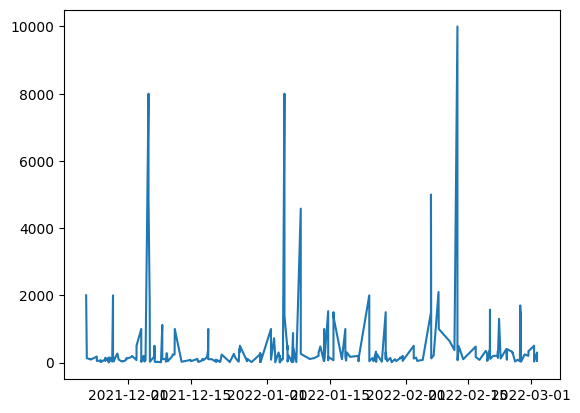

In [600]:
# plot graph
import matplotlib.pyplot as plt
plt.plot(df1['Date'],df1['INR'])

In [601]:
# # day name wise bar chart/month wise bar chart
df1['day_name'] = df1['Date'].dt.day_name()
df1.head()

,Date,Account,Category,Note,INR,Income/Expense,Amount,Currency,Account.1,Month,day_name
0,2022-03-02 10:11:00,CUB - online payment,Food,Brownie,50.0,Expense,50.0,INR,50.0,March,Wednesday
1,2022-03-02 10:11:00,CUB - online payment,Other,To lended people,300.0,Expense,300.0,INR,300.0,March,Wednesday
2,2022-03-01 19:50:00,CUB - online payment,Food,Dinner,78.0,Expense,78.0,INR,78.0,March,Tuesday
3,2022-03-01 18:56:00,CUB - online payment,Transportation,Metro,30.0,Expense,30.0,INR,30.0,March,Tuesday
4,2022-03-01 18:22:00,CUB - online payment,Food,Snacks,67.0,Expense,67.0,INR,67.0,March,Tuesday


<Axes: xlabel='day_name'>

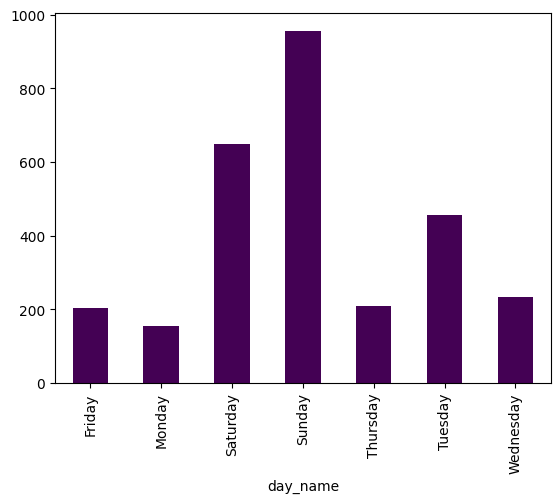

In [602]:
df1.groupby('day_name')['INR'].mean().plot(kind='bar', colormap='viridis')

In [603]:
df1.head()

,Date,Account,Category,Note,INR,Income/Expense,Amount,Currency,Account.1,Month,day_name
0,2022-03-02 10:11:00,CUB - online payment,Food,Brownie,50.0,Expense,50.0,INR,50.0,March,Wednesday
1,2022-03-02 10:11:00,CUB - online payment,Other,To lended people,300.0,Expense,300.0,INR,300.0,March,Wednesday
2,2022-03-01 19:50:00,CUB - online payment,Food,Dinner,78.0,Expense,78.0,INR,78.0,March,Tuesday
3,2022-03-01 18:56:00,CUB - online payment,Transportation,Metro,30.0,Expense,30.0,INR,30.0,March,Tuesday
4,2022-03-01 18:22:00,CUB - online payment,Food,Snacks,67.0,Expense,67.0,INR,67.0,March,Tuesday


<Axes: xlabel='Month'>

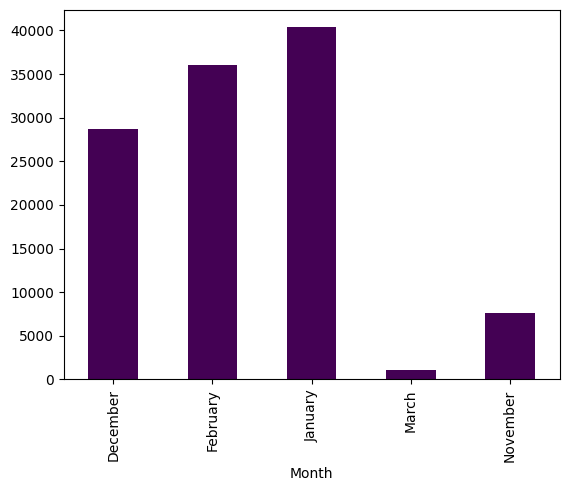

In [607]:
df1.groupby('Month')['INR'].sum().plot(kind='bar', colormap='viridis')